# NumPy and Convolution Practice

I've recently been engrossed in computer vision and working with convolutional neural networks. To help myself understand these concepts and some Python frameworks a bit better, I tried doing some manual convolutions using NumPy.



Let's start off with the assumptions I make in this code: 

- The random unsigned chars that fill the original matrix are between 0-255, to represent the grayscale range
- Border conditions will be dealt with as if there is a border of 0's surrounding the input matrix (i.e. any element of the kernel filter that exists outside of the matrix parameters will be multiplied by 0.  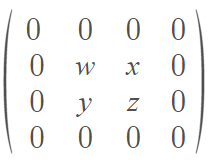 (w, x, y, z being the input matrix where the kernel will be applied)



### <font color=orange>1. Setup and Original Matrix</font>

First, we need to import the relative libraries. For this code, we use random, numpy, and time. NumPy in particular is important for faster array initializations and computations. After taking the dimensions of the input matrix as integer inputs, I initialize a matrix filled with random integers between 0-255, representing the possible grayscale values of a pixel. Afterwards, I use NumPy to reinitialize the elements as unsigned chars, to comply with the memory optimization suggestion in the instructions. 

In [1]:
# Import relative libraries
from random import *
import numpy as np
import time

# Read row and column sizes as integer arguments from the command line
rows = int(input("Input number of rows: "))
cols = int(input("Input number of cols: "))

# Do a list comprehension to initialize a rows x cols matrix with random integers 
inputMatrix = [[randint(0, 256) for j in range(cols)] for i in range(rows)]
# Reinitialize it as a NumPy array so that its elements are unsigned chars 
inputMatrix = np.array(inputMatrix, dtype=np.ubyte)

# Display input matrix
print("\n Input Matrix: \n")
print(inputMatrix)

Input number of rows: 10
Input number of cols: 2

 Input Matrix: 

[[110  54]
 [219 140]
 [175 117]
 [115 254]
 [218  95]
 [152 204]
 [ 87 138]
 [ 31 208]
 [ 21 103]
 [206 173]]


### <font color=orange>2. Convolution Setup</font>
Now, we initialize the Dy and Dx matrices using the numpy.zeros() function. Each of these matrices are the same size as the input matrix, and will store elements as short integers, as the convolutions may result in the elements being any integer value between -255 and 255. Next we set up two functions that will convolve the matrix elements, one for horizontal convolutions and one for vertical convolutions. Since we can safely assume that our kernel will remain K=(-1, 0, 1), it is unnecessary to take a kernel value as an argument for this exercise. Instead, the only arguments this function takes are the row and column value of the element being convolved.
    

In [2]:
# Initialize Dx and Dy as short integer matrices the same shape as the input matrix. 
dxMatrix = np.zeros((rows, cols), dtype = np.short)
dyMatrix = np.zeros((rows, cols), dtype = np.short)

# Horizontal convolution function
def convolveX(rowNum, colNum):
    #Case 1: element exists on the left border (i.e. doesn't have an element to its left)
    if colNum == 0:
        return inputMatrix[rowNum][1]
    #Case 2: element exists on the right border (i.e. doesn't have an element to its right)
    elif colNum == cols-1:
        return -1 * inputMatrix[rowNum][colNum-1]
    #Case 3: element has neighbouring elements to the left and right
    else: 
        return int(inputMatrix[rowNum][colNum+1]) - int(inputMatrix[rowNum][colNum-1])

# Vertical convolution function
def convolveY(rowNum, colNum):
    #Case 1: element exists on the top border (i.e. doesn't have an element above it)
    if rowNum == 0:
        return inputMatrix[1][colNum]
    #Case 2: element exists on the bottom border (i.e. doesn't have an element below it)
    elif rowNum == rows-1:
        return -1 * inputMatrix[rowNum-1][colNum]
    #Case 3: element has neighbouring elements to its top and bottom
    else:
        return int(inputMatrix[rowNum+1][colNum]) - int(inputMatrix[rowNum-1][colNum])
    
print("Setup Complete")

Setup Complete


### <font color=orange>3. Convolution Computation</font>
Now for the part we've all been waiting for. Interestingly, by multiplying the horizontal and vertical kernel together, we get a 3x3 matrix that can be used as a kernel for edge detection. 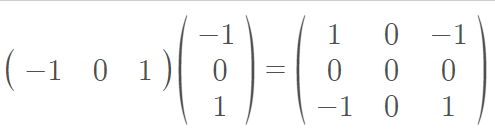
As for the actual convolution itself, we use a nested for-loop to access each element of the input matrix. At each point, we apply the **convolvex()** and **convolveY()** functions and store the computed values in their respective matrices. We measure the computation time before and after the convolutions take place and find their difference in order to calculate computation time. 

In [3]:
# Take time point before the convolutions
start = time.time()

# Use a nested for-loop to perform the convolutions on each element and store the values in their respective matrices
for i in range(rows):
    for j in range(cols):
        # Apply the convolution functions to each element
        dxMatrix[i][j] = convolveX(i, j)
        dyMatrix[i][j] = convolveY(i, j)
# Take time point after the convolutions
stop = time.time()

# Print total computation time, Dx, and Dy
print("Convolution Matrices:\n")
print("Dx Matrix:")
print(dxMatrix)
print("\n Dy Matrix:")
print(dyMatrix)
print("\n Total computation time:", stop-start)

Convolution Matrices:

Dx Matrix:
[[  54 -110]
 [ 140 -219]
 [ 117 -175]
 [ 254 -115]
 [  95 -218]
 [ 204 -152]
 [ 138  -87]
 [ 208  -31]
 [ 103  -21]
 [ 173 -206]]

 Dy Matrix:
[[ 219  140]
 [  65   63]
 [-104  114]
 [  43  -22]
 [  37  -50]
 [-131   43]
 [-121    4]
 [ -66  -35]
 [ 175  -35]
 [ -21 -103]]

 Total computation time: 0.0010402202606201172


### <font color=orange>4. Min and Max Computation</font>
To compute the max and min, we simply use the NumPy functions amax() and amin(). 



In [4]:
print("Dx Matrix Max:", np.amax(dxMatrix))
print("Dx Matrix Min:", np.amin(dxMatrix))
print("Dy Matrix Max:", np.amax(dyMatrix))
print("Dy Matrix Min:", np.amin(dyMatrix))

Dx Matrix Max: 254
Dx Matrix Min: -219
Dy Matrix Max: 219
Dy Matrix Min: -131


### <font color=orange>5. Conclusion</font>
Thanks for following until the end! As I familiarize myself with both CV/ML, I can't wait to make more exciting projects.